In [1]:
%load_ext lab_black
import pandas as pd
import numpy as np
import drnb as nb

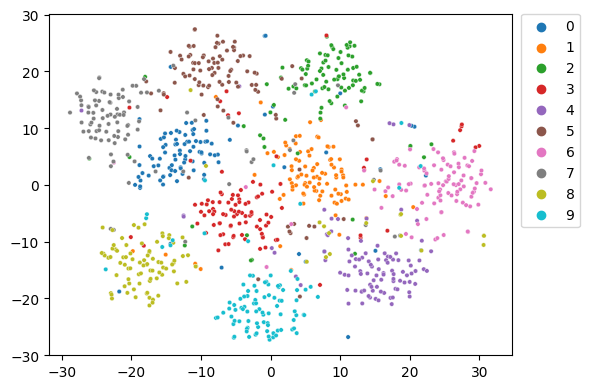

In [2]:
s1k_tsne = nb.tsne_data("s1k")

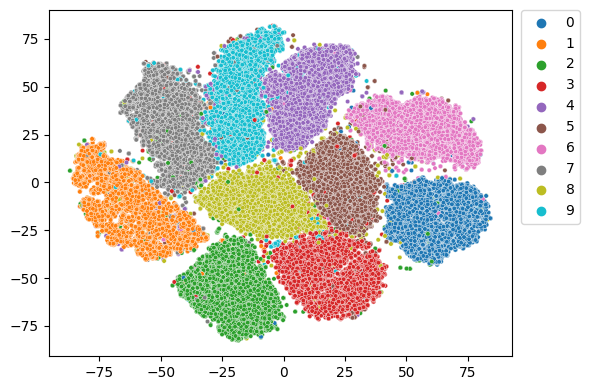

In [3]:
mnist_tsne = nb.tsne_data("mnist")